<a href="https://colab.research.google.com/github/debsdamaso/EstudoCarros/blob/main/CarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2


Dataset de caracteristicas e preço de carros: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Grupo:

Participante:
Debora Damaso Lopes - RM 97836

# <span style="color:#9B59B6"> Apresentação do estudo de preços de carros para o Checkpoint 2</span>


# <span style="color:#9B59B6"> 1. Sumário </span> <a class="ancora" id="sumario_1"></a>

Está é uma breve análise referente à um dataset sobre o preços de carros que será utilizado para a resolução do segundo checkpoint da matéria de IA & Chatbot da FIAP, segundo semestre.


# <span style="color:#9B59B6">  2. Business Understanding </span>  

Construir um modelo que prediga o preço de venda de um veículo.


## <span style="color:#9B59B6"> 3. Etapa de Preparação

#### 3.1 Datasets utilizados:
O Dataset <a href="https://www.kaggle.com/datasets/hellbuoy/car-price-prediction">Car Price Prediction Multiple Linear Regression</a> utilizado foi o indicado pelo professor, retirado do site Kaggle. Se trata de um Dataset com o índice de usabilidade de 7.06 calculado pelo Kaggle.

#### 3.2 Organização dos Dados:

* O arquivo base do estudo se chama <i>CarPrice_Assignment.csv</i> e foi extraído do dataset para dentro desta <a href="https://drive.google.com/drive/folders/1Sr9RFzkYoZgy-vRkah25iN5Kfvqa5V2v?usp=sharing">pasta do google drive</a>.
* O arquivo com o nome <i>Data Dictionary - carprices.xlsx</i> contém a descrição dos significados de cada coluna. Para facilitar o entendimento, o significado será exibido neste estudo, mas será traduzido para o português.

## <span style="color:#9B59B6"> 4. Nomenclaturas

Esta é uma apresentação dos significados das colunas deste dataset, retiradas do arquivo <i>Data Dictionary - carprices.xlsx</i> e traduzidas para português para facilitar a visualização e entendimento do estudo a seguir.


* Car_ID: Identificação única de cada observação (Número inteiro)
* Symboling: Classificação de risco de seguro atribuída, um valor de +3 indica que o veículo é arriscado, -3 indica que é provavelmente bastante seguro.
* carCompany: Nome da empresa fabricante do carro (Categórico)
* fueltype: Tipo de combustível do carro, ou seja, gasolina ou diesel (Categórico)
* aspiration: Tipo de aspiração usado em um carro (Categórico) -> standard ou turbo
* doornumber: Número de portas em um carro (Categórico)
* carbody: Tipo de carroceria do carro (Categórico)
* drivewheel: Tipo de tração do carro (Categórico)
* enginelocation: Localização do motor do carro (Categórico)
* wheelbase: Distância entre eixos do carro (Numérico)
* carlength: Comprimento do carro (Numérico)
* carwidth: Largura do carro (Numérico)
* carheight: Altura do carro (Numérico)
* curbweight: Peso do carro sem ocupantes ou bagagem (Numérico)
* enginetype: Tipo de motor (Categórico)
* cylindernumber: Número de cilindros no carro (Categórico)
* enginesize: Tamanho do motor (Numérico)
* fuelsystem: Sistema de combustível do carro (Categórico)
* boreratio: Razão do diâmetro do cilindro (Numérico)
* stroke: Curso ou volume dentro do motor (Numérico)
* compressionratio: Taxa de compressão do carro (Numérico)
* horsepower: Potência do motor (Numérico)
* peakrpm: Rotação máxima do motor do carro (Numérico)
* citympg: Consumo de combustível na cidade (Numérico)
* highwaympg: Consumo de combustível na estrada (Numérico)
* price (Variável dependente): Preço do carro (Numérico)

## <span style="color:#9B59B6"> 5. Imports necessários:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## BUSINESS UNDERSTANDING

Construir um modelo que prediga o preço de venda de um veículo.

## DATA UNDERSTANDING


Exercício 1: Importar dados


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Checkpoint2/CarPrice_Assignment.csv")

### EDA - Análise Exploratória de Dados

Exercício 2: Realizar uma análise exploratória de dados (EDA).

Visualizando as informações do dataset de forma geral:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Obs: não será utlizado a função df.dtypes, pois já é possível visualizar os tipos de dados na função acima, de forma detalhada. São estes: float, int e object.
Também vale observar que estes são não-nulos (non-null).

Visualizando o dataframe:

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Erro visualizado

Em <b>CarName</b> é possível visualizar que os valores armazenam tanto o nome da empresa/companhia do carro quanto o nome do carro.
Portanto, estes nomes serão separados, adiantando uma parte da etapa DATA PREPARATION (Exercício 4, que se refere ao tratamento de erros dos dados), para que a análise exploratória seja continuada após esta correção, pois pretendo utilizar gráficos também com o nome da companhia.

In [ ]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Agora pode dar drop em car name ( nome do carro)
df.drop(columns=["CarName"],inplace=True)

In [ ]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Outras correções de erro em companhia:

Vamos corrigir os erros de ortografia e de repetição na coluna CompanyName, para gerar um nome apenas.

* maxda, mazda
* Nissan, nissan
* porsche, porcshce
* toyota, toyouta
* vokswagen, volkswagen, vw

In [ ]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('Nissan','nissan')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [ ]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Finalmente, agora vamos realizar uma visualização estatística do dataset:

In [ ]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


###Visualizando a relação entre preço e demais colunas:

In [ ]:
df.corr()[['price']].sort_values(by='price',ascending=False)

<ipython-input-142-c5721cff01f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['price']].sort_values(by='price',ascending=False)


,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


####<b>Conclusão:</b>

* Variáveis Altamente Correlacionadas Positivamente com o Preço:

"enginesize," "curbweight," "horsepower," "carwidth," "carlength," e "wheelbase" têm correlações positivas fortes com o preço. Isso significa que à medida que essas variáveis aumentam, o preço tende a aumentar. Por exemplo, carros com motores maiores (enginesize), maior peso (curbweight), mais cavalos de potência (horsepower) e dimensões maiores têm preços mais altos.

* Variáveis Correlacionadas Negativamente com o Preço:

"citympg" e "highwaympg" têm correlações negativas fortes com o preço. Isso significa que à medida que o consumo de combustível em milhas por galão (mpg) aumenta, o preço tende a diminuir. Carros mais eficientes em termos de consumo de combustível geralmente têm preços mais baixos.

* Variáveis com Correlações Baixas ou Próximas a Zero:

"carheight," "stroke," "compressionratio," "symboling," "peakrpm" têm correlações relativamente baixas com o preço. Isso sugere que essas variáveis têm menos impacto direto no preço dos carros.

* Correlação Negativa do "symboling":

A variável "symboling," que representa a classificação de risco do seguro, tem uma correlação negativa com o preço. Isso indica que carros com classificações de risco mais baixas (mais seguros) tendem a ter preços mais altos.


Em resumo, a análise das correlações indica que características como tamanho do motor, peso, potência, dimensões do carro e eficiência de combustível têm uma forte influência no preço dos carros. Por outro lado, a classificação de risco, a rotação máxima do motor e outras variáveis têm menos impacto direto no preço.

### Vamos começar com o preço dos carros por companhia:

Qual o preço mínimo, médio e o preço máximo de carros vendidos?

In [ ]:
df["price"].describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

De acordo com a visualização acima, o <b> preço médio é 13276, o preço mínino é 5118 e o
preço máximo é 45400.</b>

Porém, ainda fica um questionamento:

<b>Essa média está precisa? Que valores estão muito diferentes da maioria?</b> Vamos construir um gráfico para uma melhor visualização destes valores e procurar por outliers e entender mais sobre estes valores.

Text(0.5, 1.0, 'Preço do carro por companhia')

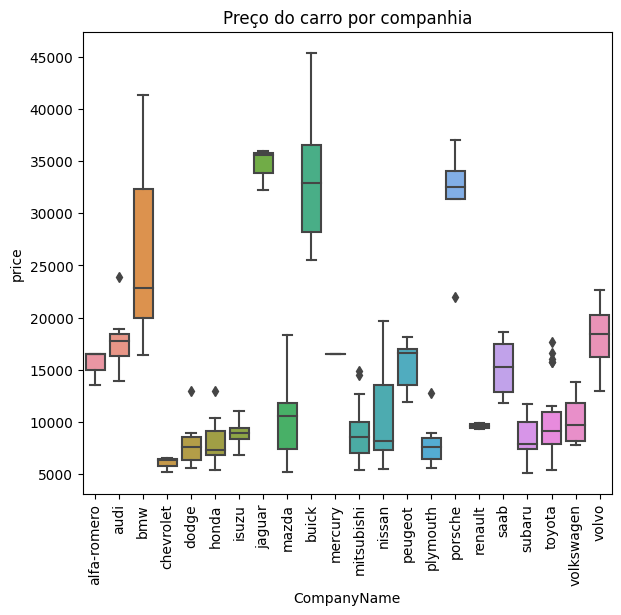

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Preço do carro por companhia")

<b>Nota:</b> Podemos observar que a coluna preços tem algumas assimetrias, o que é comum em preços de carros. Por exemplo, em relação aos valores que estão acima do preço, isto pode ser explicado pela presença de carros de luxo, carros com recursos premium.

Num primeiro momento, essa assimetria não será tratada, pois a transformação dos dados pode "espremer" os preços em direção à média e distorcer a relação entre os valores reais dos carros.

O modelo será construido, e caso haja necessidade, essa assimetria será tratada posteriormente e o modelo será reproduzido novamente.

<b>Observação</b>: Escolhi 2 companhias com menos valores para visualizar (mercury e renault):

In [ ]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [ ]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


Em relação a mercury e renault, os valores não variam pela pequena quantidade de carros: há respectivamente 1 e 2 carros.

<b>Agora vamos visualizar a relação entre a companhia e sua média de preços até este momento:</b>

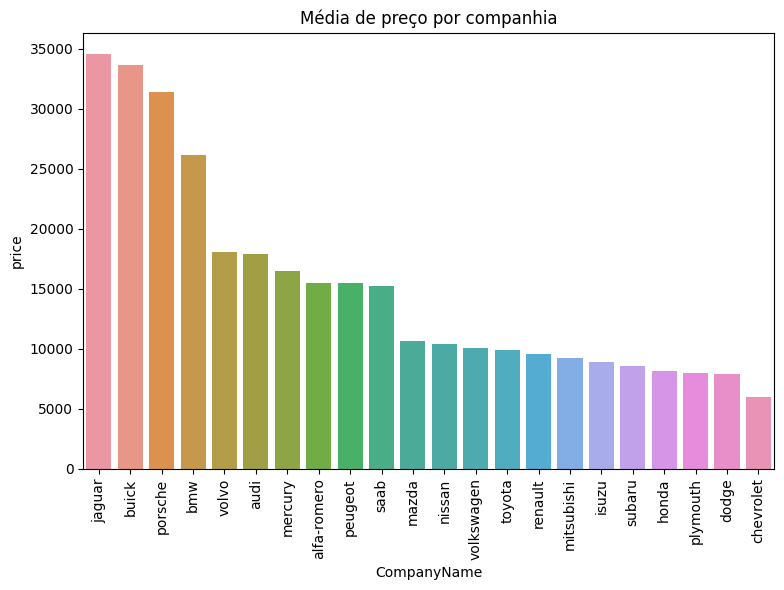

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x)
plt.xticks(rotation=90)
plt.title("Média de preço por companhia")
plt.tight_layout()
plt.show()

As companhias que apresentam a maior média de preço são: jaguar, buick e porsche.

<b>Agora vamos visualizar qual é a quantidade de carros por companhia neste dataset:<b>

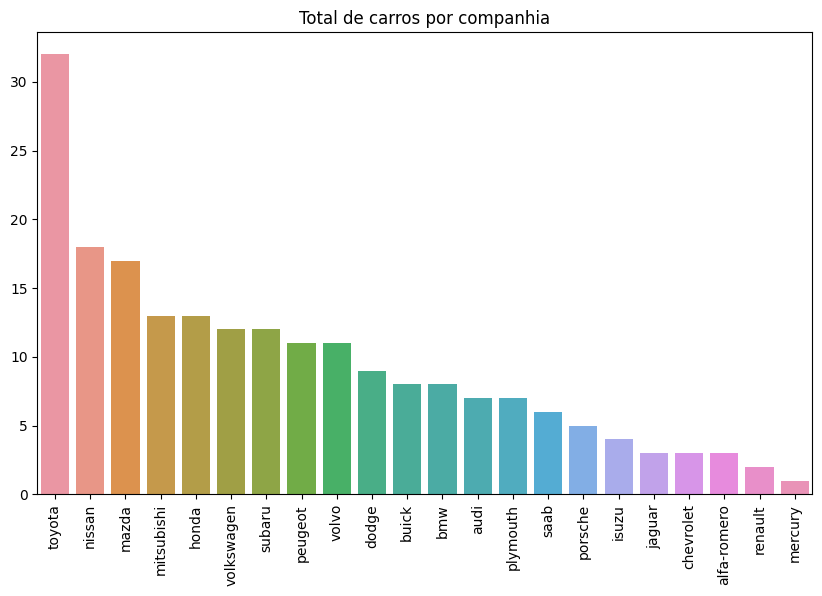

In [ ]:
plt.figure(figsize=(10,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title("Total de carros por companhia")
plt.xticks(rotation=90)
plt.show()

##### <b>Algumas conclusões:</b>
* Comparando o gráfico anterior com este acima, no qual um se refere à média de preços por companhia, e este outro se refere ao número total de carros por companhia, podemos visualizar que, apesar da média maior de preços, a <b>jaguar, porsche e buick estão em número pequeno de quantidade de carros.</b>
Isto talvez ocorra porque estas 3 companhias produzem carros exclusivos, caros e/ou luxuosos, então a quantidade também é menor pois há menos pessoas que comprem estes carros.
* A <b>toyota é a que tem a maior quantidade</b> de carros, em disparada.


### Agora vamos visualizar à respeito do tipo de combustível:

Vamos verificar qual é o combustível mais utilizado, o preço médio de cada, e o preço.

<b>Gráfico 1: Tipo de combustível mais utilizado:</b>

Text(0.5, 1.0, 'Tipo de combustível mais utilizado por carro ')

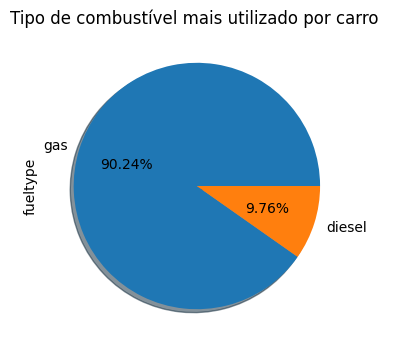

In [ ]:
plt.figure(figsize = [4, 4], clear = True)
df["fueltype"].value_counts().plot.pie( autopct='%1.2f%%', shadow = True);
plt.title("Tipo de combustível mais utilizado por carro ")

<b>Gráfico 2: Preço médio por combustível: </b>

In [ ]:
preco_med_combustivel = df.groupby("fueltype")["price"].mean()
preco_med_combustivel

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<Axes: xlabel='fueltype'>

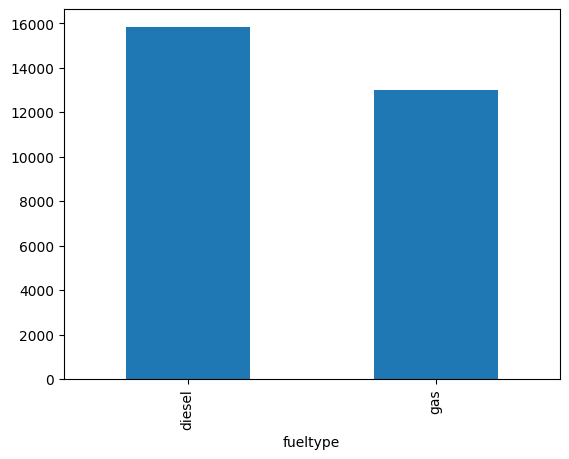

In [ ]:
preco_med_combustivel.plot(kind="bar")

<b>Gráfico 3: Preço por tipo de combustível: </b>

##### <b>Conclusões sobre combustíveis:</b>

* De acordo com o gráfico 1, os <b>carros com gasolina são os que mais vendem (90,24% das vendas)</b>, e também estão disponiveis nas mais diversas <b>faixas de preços diferentes</b> (no gráfico 3). Podemos observar também no gráfico 3, que há alguns carros com preço mais alto em carros com gasolina, que são os valores assimétricos em cima.

* De acordo com gráfico 2, o <b>preço médio dos carros à diesel é maior</b> do que o dos carros à gasolina.

* Como a gasolina é o tipo de combustível mais utlizado (gráfico 1), e também é que tem a menor média de preço (gráfico 2), <b>conclui-se que o motivo da preferência pelos carros com gasolina seja por estes geralmente possuirem menores preços.</b>

### Agora vamos analisar a coluna aspiration (carro padrão ou turbo)

<b>Qual mais se repete: carro padrão ou carro turbo?</b>

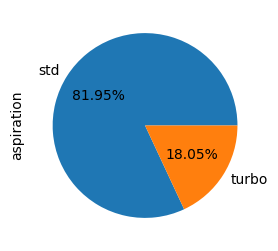

In [ ]:
plt.figure(figsize = [3, 3], clear = True)
df["aspiration"].value_counts().plot.pie( autopct='%1.2f%%');

<b>Preço médio do Standard e Turbo</b>

In [ ]:
ST = df.groupby("aspiration")["price"].mean()
ST

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<Axes: xlabel='aspiration'>

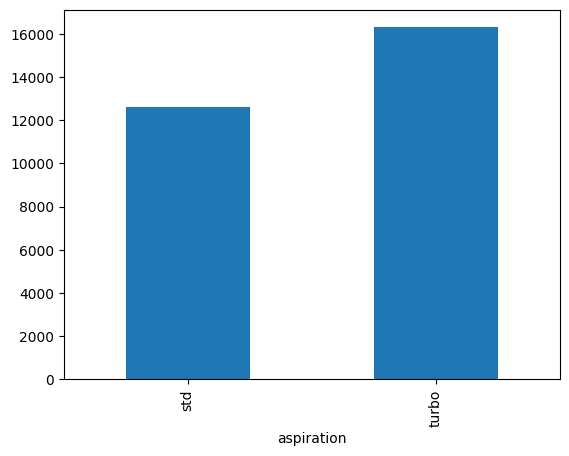

In [ ]:
ST.plot(kind="bar")

<b>Conclusão: </b>
* A maioria dos carros são Standard (81,95%)
* O preço médio do Standard também é menor.

### Analise do número de portas do carro

<b>Número de portas que mais se repete: 2 ou 4</b>

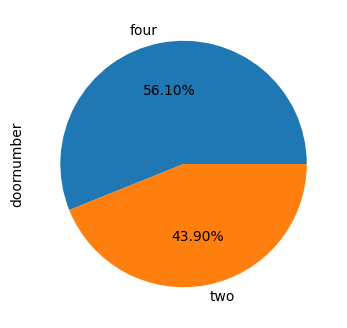

In [ ]:
plt.figure(figsize = [4, 4], clear = True)
df["doornumber"].value_counts().plot.pie( autopct='%1.2f%%');

<b>Média de preço por portas</b>

In [ ]:
NP = df.groupby("doornumber")["price"].mean()
NP

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

<Axes: xlabel='doornumber'>

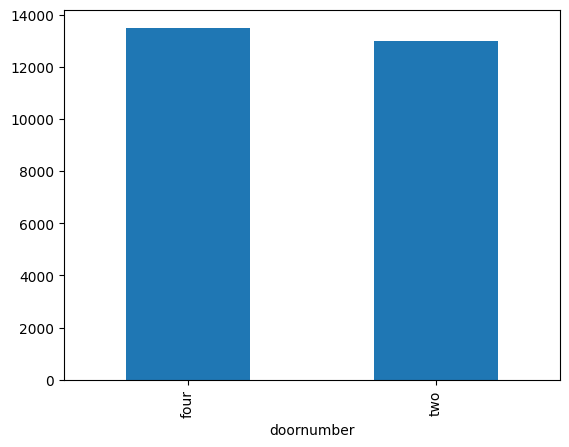

In [ ]:
NP.plot(kind="bar")

<b>Conclusão:</b>
* A quantidade de portas influencia muito pouco no preço médio.
* 56,10% dos carros possuem 4 portas enquanto que 43,90% dos carros possuem 2.

### Análise sobre a carroceria

<b>Qual é o tipo de carroceria que mais aparece?

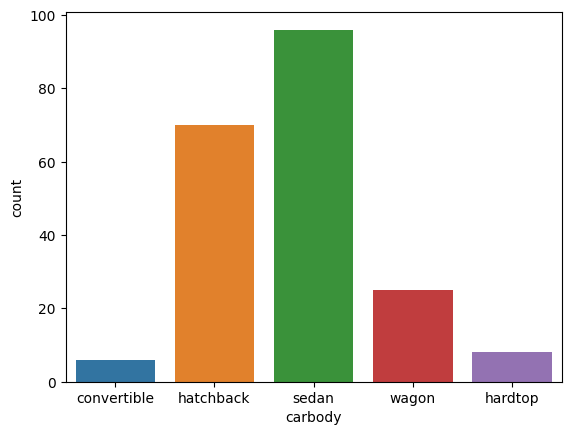

In [ ]:
sns.countplot(x="carbody", data=df)
plt.show()

<b>Preço médio do tipo de carroceria</b>

In [ ]:
carroceria = df.groupby("carbody")["price"].mean()
carroceria

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

<Axes: xlabel='carbody'>

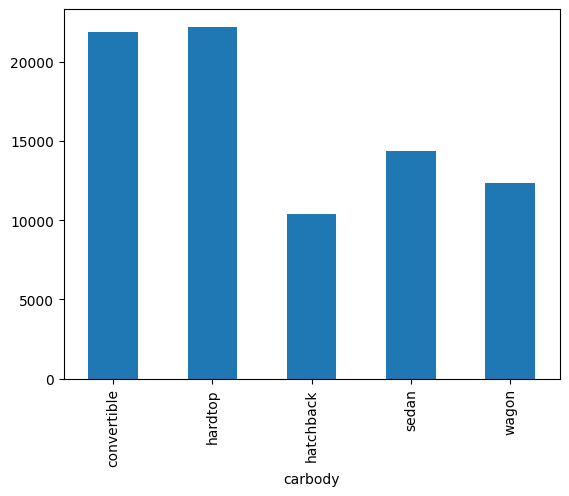

In [ ]:
carroceria.plot(kind="bar")

<b>Verificando se a distância entre eixos, comprimento do carro, largura do carro, altura do carro, afetam o valor do carro</b>


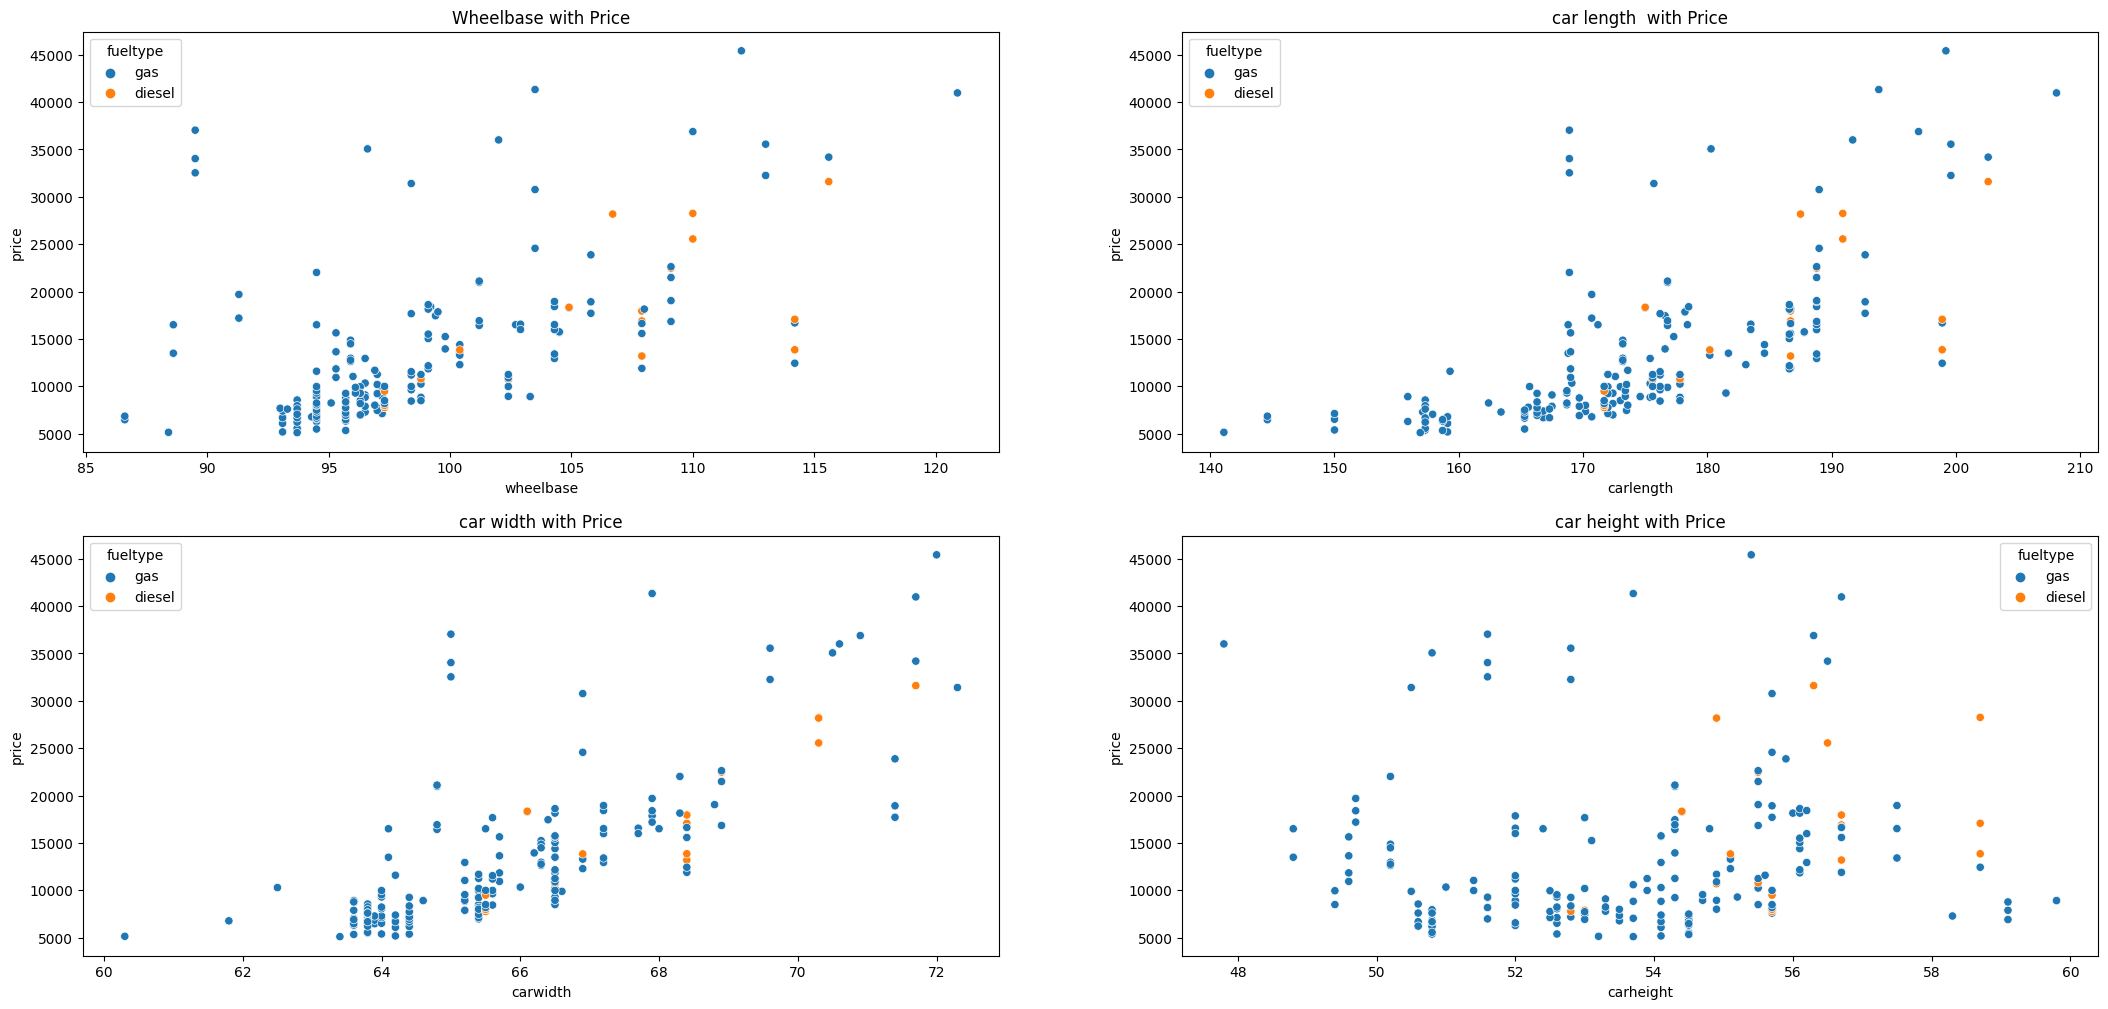

In [ ]:
fig = plt.figure(figsize=(26, 12))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=df,x="wheelbase",y="price",hue="fueltype",markers=True)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=df,x="carlength",y="price",hue="fueltype",markers=True)

ax3 = fig.add_subplot(223)
sns.scatterplot(data=df,x="carwidth",y="price",hue="fueltype",markers=True)


ax4 = fig.add_subplot(224)
sns.scatterplot(data=df,x="carheight",y="price",hue="fueltype",markers=True)



ax1.title.set_text('Wheelbase with Price')
ax2.title.set_text('car length  with Price')
ax3.title.set_text('car width with Price')
ax4.title.set_text('car height with Price')
plt.show()

<b>Conclusão sobre a carroceria:</b>

* O modelo mais popular é o sedan.
* A distância entre eixos, o comprimento e a largura do carro afetam o valor do carro, porém a altura do carro não afeta.




### Qualidade dos Dados


Exercício 3: Realizar análises de qualidade dos dados.

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<b> Conclusão</b>:

* Não há valores nulos e duplicados no dataset.

## DATA PREPARATION

Exercício 4: Realizar tratamento dos problemas encontrados na Analise de Qualidade dos Dados.

* OBS: Outros problemas já foram previamentes resolvidos no item <b>EDA - Analisé Exploratória de Dados</b>, sendo estes referentes à coluna CarName, no qual os valores armazenavam tanto o nome da empresa/companhia do carro quanto o nome do carro, e correção de erros de ortografia e unificação de nomes de companhias (que estavam separadas em maiusculas, minusculas, siglas).

* Contudo, darei continuidade removendo outros valores desnecessários para a análise, como no caso da coluna <i>car_ID</i>.

<b>Removendo car_ID</b>

In [ ]:
df.drop(columns="car_ID",inplace=True)

Exercício 5: Caso seja necessário, realizar escalonamento e/ou normalização de variáveis numéricas.

In [ ]:
# Selecionar colunas numericas
colunas_numericas = df.select_dtypes(include=['number'])

scaler = StandardScaler()

df[colunas_numericas.columns] = scaler.fit_transform(colunas_numericas)

In [ ]:
print(df)

     symboling  CompanyName fueltype aspiration doornumber      carbody  \
0     1.743470  alfa-romero      gas        std        two  convertible   
1     1.743470  alfa-romero      gas        std        two  convertible   
2     0.133509  alfa-romero      gas        std        two    hatchback   
3     0.938490         audi      gas        std       four        sedan   
4     0.938490         audi      gas        std       four        sedan   
..         ...          ...      ...        ...        ...          ...   
200  -1.476452        volvo      gas        std       four        sedan   
201  -1.476452        volvo      gas      turbo       four        sedan   
202  -1.476452        volvo      gas        std       four        sedan   
203  -1.476452        volvo   diesel      turbo       four        sedan   
204  -1.476452        volvo      gas      turbo       four        sedan   

    drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0          rwd          fro

Exercício 6: Caso seja necessário, realizar o Onehot Enconding e/ou Label Encoding de variáveis categóricas.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar One Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# O DataFrame 'df_encoded' agora contém as variáveis dummy
print(df_encoded)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2     0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3     0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4     0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200  -1.476452   1.721873   1.198549  1.398245   0.728239    0.763241   
201  -1.476452   1.721873   1.198549  1.351515   0.728239    0.949992   
202  -1.476452   1.721873   1.198549  1.398245   0.728239    0.878757   
203  -1.476452   1.721873   1.198549  1.398245   0.728239    1.273437   
204  -1.476452   1.721873   1.198549  1.398245   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  ...  \
0      0.074449   0.519071 -1.839377         -0.288349  ... 

## MODELING

Exercício 7: Realizar a separação dos dados teste e treino (Train Test Split).

Para garantir uma maior precisão do modelo, as colunas escolhidas para serem utilizadas serão as que tem mais relação (correlação) com o preço.

In [ ]:
df.corr()[['price']].sort_values(by='price',ascending=False)

<ipython-input-149-c5721cff01f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['price']].sort_values(by='price',ascending=False)


,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


In [ ]:
from sklearn.model_selection import train_test_split

# Colunas com correlações fortes com preço
X = df[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'citympg', 'highwaympg']]
y = df['price']

# 80% de treinamento e 20% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Exercício 8: Realizar o treinamento de pelo menos 3 modelos diferentes de Regressão.

In [ ]:
# 1. Regressão Linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 2. Regressão de Árvore de Decisão
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# 3. Regressão de Floresta Aleatória
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Exercício 9: Avaliar qual o melhor modelo dentre o 3 modelo utilizados.

In [ ]:
# Avaliando os modelos usando os dados de teste
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree_reg.predict(X_test)
y_pred_forest = random_forest_reg.predict(X_test)

# Calcular o R² para os modelos
r2_linear = r2_score(y_test, y_pred_linear)
r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"R² da Regressão Linear: {r2_linear}")
print(f"R² da Regressão de Árvore de Decisão: {r2_tree}")
print(f"R² da Regressão de Floresta Aleatória: {r2_forest}")

R² da Regressão Linear: 0.8145536079513174
R² da Regressão de Árvore de Decisão: 0.9017565266105596
R² da Regressão de Floresta Aleatória: 0.9572920009767456


#### <b>Conclusão: </b>
* O melhor modelo foi o <b>RandomForestRegressor</b>, com score de <b>95,729%</b>
* O pior modelo foi o LinearRegression, com 81,45%.